## Linear Regression

Author: Thomas James Tiam-Lee

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [3]:
df_marketing = pd.read_csv('tvmarketing.csv')
df_marketing

,TV,Sales
0,265.6,17.4
1,175.1,14.9
2,163.5,18.0
3,31.5,9.5
4,253.8,17.6
5,135.2,17.2
6,66.1,8.6
7,225.8,13.4
8,214.7,17.4
9,25.6,9.5


### Plot the Dataset

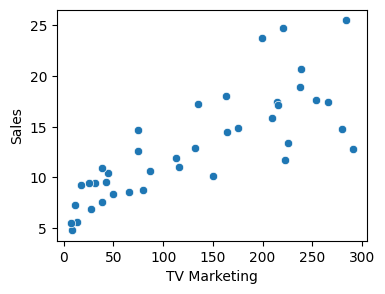

In [8]:
fig, ax = plt.subplots(1,1,figsize=(4,3));
sns.scatterplot(data=df_marketing, x='TV', y='Sales', ax=ax);
ax.set_xlabel('TV Marketing');
ax.set_ylabel('Sales');

### Linear Regression Model

We can define a linear regression model as follows:

$\hat{y}=w_1 x + w_0$

where:
- $\hat{y}$ is the predicted value (in this case, the sales)
- $x$ is the input value (in this case, the TV marketing)
- $w_1$ is the slope of the line
- $w_0$ is the y-intercept (or bias)

$w_0$ and $w_1$ are the **parameters** of the model. Notice that as we change these values, the corresponding model (i.e., relationship between $x$ and $\hat{y}$) also changes.

In [25]:
from ipywidgets import Layout, interact, FloatSlider

def plot_linear_regression_model(w0, w1):
  fig, ax = plt.subplots(1,1,figsize=(5,3));
  sns.scatterplot(data=df_marketing, x='TV', y='Sales', ax=ax);
  ax.set_xlabel('TV Marketing');
  ax.set_ylabel('Sales');
  ax.set_xlim((-1,301));
  ax.set_ylim((-1,30));
  xlist = np.linspace(0, 300, 100)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='red');

interact(plot_linear_regression_model,
                 w0=FloatSlider(min=-300, max=300, value=0, step=0.1, layout=Layout(width='600px')),
                 w1=FloatSlider(min=-2, max=2, value=0, step=0.01, layout=Layout(width='600px')));


interactive(children=(FloatSlider(value=0.0, description='w0', layout=Layout(width='600px'), max=300.0, min=-3…

### The Cost Function

The cost function gives us a numerical measure of how well a line captures the points. For linear regression, we use the [mean squared error](https://statisticsbyjim.com/regression/mean-squared-error-mse/).

In [34]:
def mse(y, y_pred):
  return np.power(y_pred - y, 2).sum() * (1 / (2 * len(y)))

When we change the parameters of a line, the predictions also change for each point. Therefore, the cost also changes as the predictions get closer or farther away from the correct answers.

In [38]:
def plot_linear_regression_model_with_cost(w0, w1):
  fig, ax = plt.subplots(1,1,figsize=(5,3));
  sns.scatterplot(data=df_marketing, x='TV', y='Sales', ax=ax);
  ax.set_xlabel('TV Marketing');
  ax.set_ylabel('Sales');
  ax.set_xlim((-1,301));
  ax.set_ylim((-1,30));
  xlist = np.linspace(0, 300, 100)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='red');
  
  y_pred = w1 * df_marketing['TV'].to_numpy() + w0
  y = df_marketing['Sales'].to_numpy()
  cost = mse(y, y_pred)
  ax.set_title(f'Cost: {cost}');

interact(plot_linear_regression_model_with_cost,
                 w0=FloatSlider(min=-300, max=300, value=0, step=0.1, layout=Layout(width='600px')),
                 w1=FloatSlider(min=-2, max=2, value=0, step=0.01, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=0.0, description='w0', layout=Layout(width='600px'), max=300.0, min=-3…

For now, we focus only on the $w_1$ parameter (slope). We're going to assume that $w_0=5$ is fixed.

We can plot the cost as the $w_1$ parameter is changed.

In [57]:
w1list = np.linspace(-0.05, 0.15, 100)
costs = []
x = df_marketing['TV'].to_numpy()
y = df_marketing['Sales'].to_numpy()
for w1 in w1list:
  y_pred = w1 * x + 5
  cost = mse(y, y_pred)
  costs.append(cost)

def plot_linear_regression_model_and_w1_cost(w1):
  w0 = 5
  fig, ax = plt.subplots(1,2,figsize=(8,3));
  sns.scatterplot(data=df_marketing, x='TV', y='Sales', ax=ax[0]);
  ax[0].set_xlabel('TV Marketing');
  ax[0].set_ylabel('Sales');
  ax[0].set_xlim((-1,301));
  ax[0].set_ylim((-1,30));
  xlist = np.linspace(0, 300, 100)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax[0], color='red');
  
  y_pred = w1 * df_marketing['TV'].to_numpy() + w0
  y = df_marketing['Sales'].to_numpy()
  cost = mse(y, y_pred)
  ax[0].set_title(f'Cost: {cost}');

  sns.lineplot(x=w1list, y=costs, ax=ax[1], color='purple');
  ax[1].plot(w1, cost, marker='o', color='red');
  ax[1].set_xlabel('w_1 parameter value');
  ax[1].set_ylabel('Cost');
  ax[1].set_title('Loss Landscape');

interact(plot_linear_regression_model_and_w1_cost,
                 w1=FloatSlider(min=-0.05, max=0.15, value=0, step=0.005, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=0.0, description='w1', layout=Layout(width='600px'), max=0.15, min=-0.…

### Finding the Best Line

There are two ways to find the best parameters for the model.

- **Analytical Solution**: set the derivative of the cost function to 0 and solve for the equation.
- **Gradient Descent**: start with a random value and continuously adjust it based on the direction of the gradient at that point.

### Gradient Descent

We start with a random $w_1$.

In [87]:
w1 = -0.05

This loop gets the derivative at the current point, and adjusts $w_1$ to the direction of lowering the loss.

Iteration 1: w_1 = -0.05
  Cost: 149.61071406250002
Iteration 2: w_1 = 0.004372636249999992
  Cost: 39.7509110692131
Iteration 3: w_1 = 0.030819920143774087
  Cost: 13.758881664310866
Iteration 4: w_1 = 0.04368408994679486
  Cost: 7.609356777336655
Iteration 5: w_1 = 0.04994132473073835
  Cost: 6.154423969035706
Iteration 6: w_1 = 0.05298489363109586
  Cost: 5.810197461203483
Iteration 7: w_1 = 0.05446530981669173
  Cost: 5.728755976058378
Iteration 8: w_1 = 0.05518539605568465
  Cost: 5.709487513718245
Iteration 9: w_1 = 0.05553565174501856
  Cost: 5.704928735838746
Iteration 10: w_1 = 0.055706018905599695
  Cost: 5.7038501621888225
Iteration 11: w_1 = 0.055788886851184466
  Cost: 5.70359497951727
Iteration 12: w_1 = 0.05582919448078876
  Cost: 5.703534605155383
Iteration 13: w_1 = 0.05584880043328164
  Cost: 5.703520321020999
Iteration 14: w_1 = 0.05585833692493165
  Cost: 5.703516941498818
Iteration 15: w_1 = 0.055862975550523726
  Cost: 5.703516141928478
Iteration 16: w_1 = 0.05586

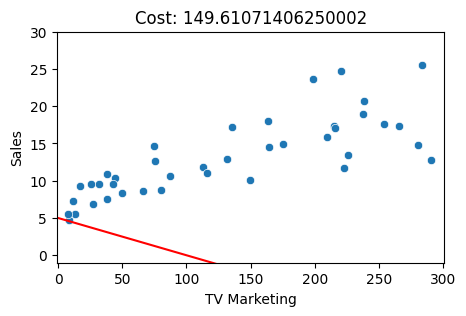

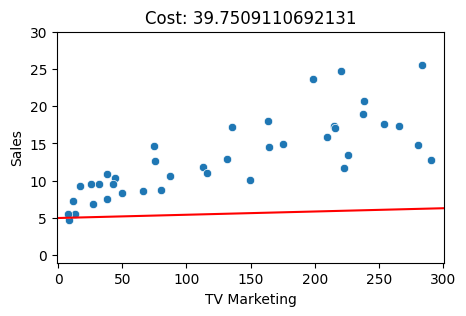

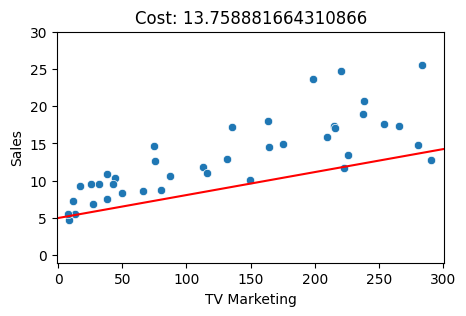

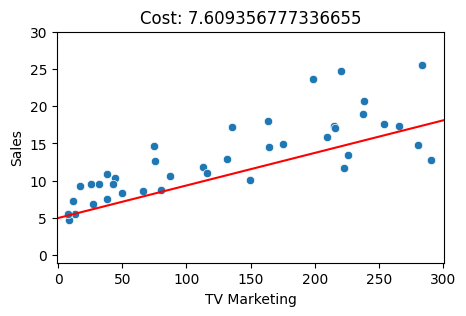

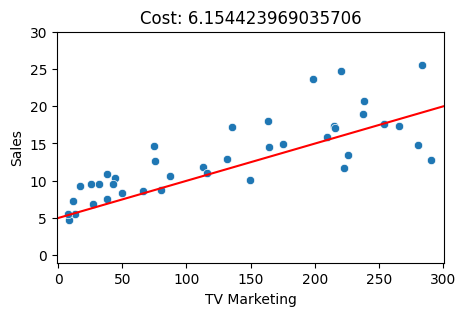

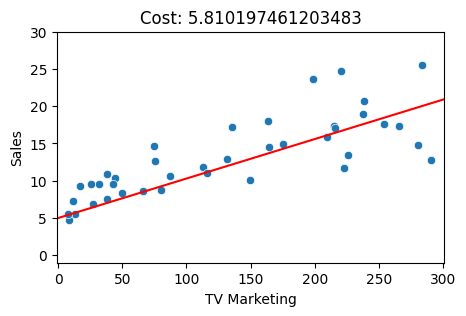

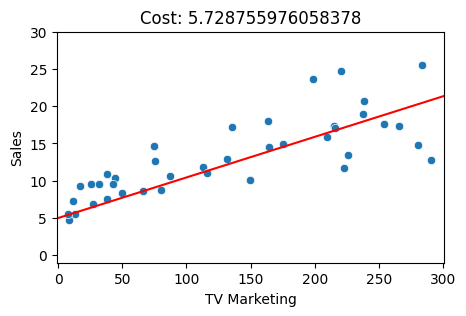

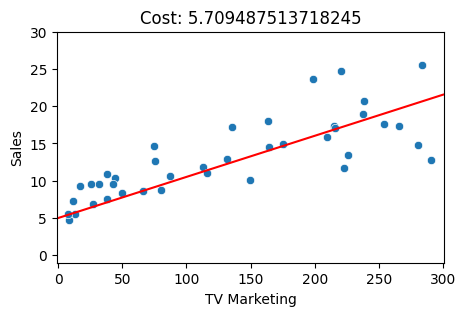

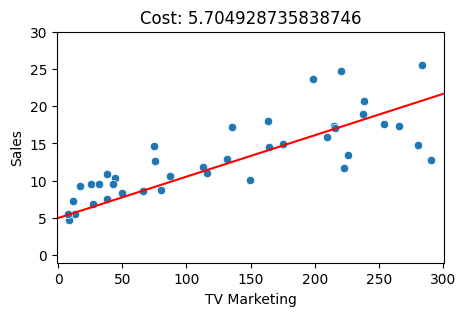

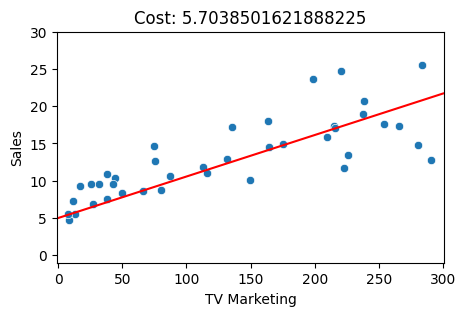

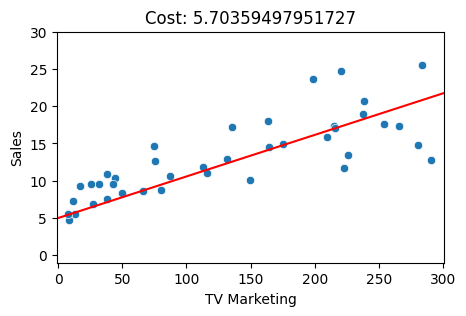

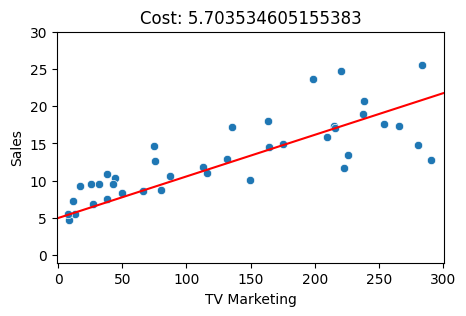

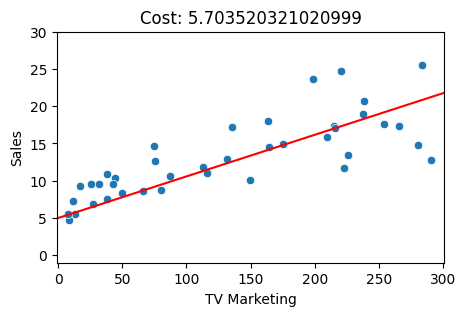

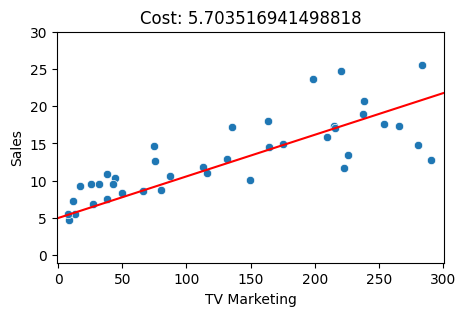

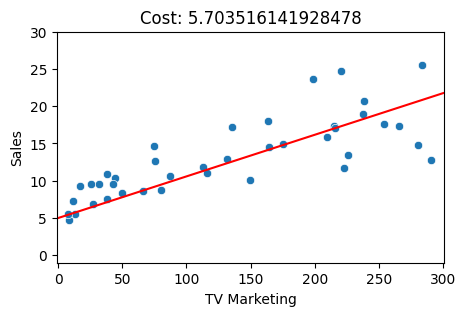

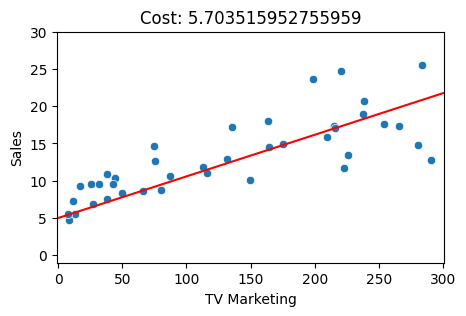

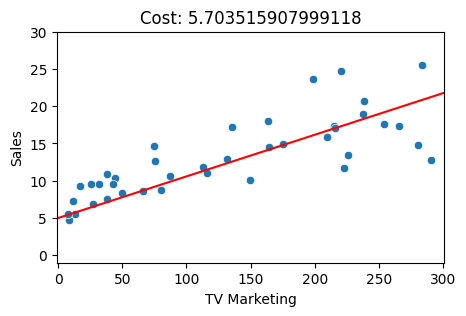

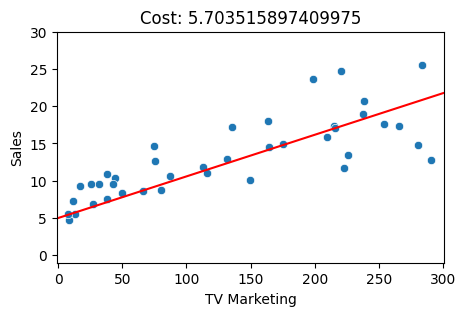

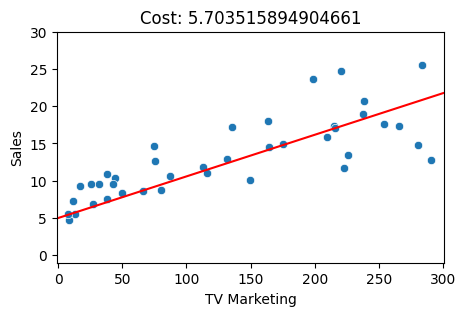

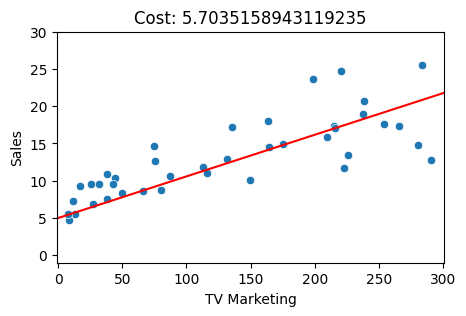

In [88]:
lr = 0.0000005
num_iter = 20
x = df_marketing['TV'].to_numpy()
y = df_marketing['Sales'].to_numpy()
for i in range(num_iter):
  print(f'Iteration {i + 1}: w_1 = {w1}')
  y_pred = w1 * x + 5
  cost = mse(y, y_pred)
  print(f'  Cost: {cost}')
  plot_linear_regression_model_with_cost(5, w1)
  gradient = (y_pred - y) @ x
  w1 = w1 - lr * gradient

Here we only focused on one parameter, $w_1$. But in reality, we have to consider all the parameters. In this case, there are two parameters $w_0$ and $w_1$. So, the actual loss landscape looks like this: